In [1]:
# Import libraries
import xarray as xr
import rioxarray 
from pathlib import Path
import pandas as pd


In [2]:
# If you want to get min and max lat and long values for a particular country 
def get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes):
    # Get min of lat and long for the country
    min_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmin']
    min_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmin']
    # Get max of lat and long for the country
    max_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmax']
    max_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmax']
    return  min_long, min_lat, max_long, max_lat

In [3]:
# Get xarray dataset from source
def get_xarray_dataset(path_to_dataset='SeasFire.zarr'):
    ds = xr.open_zarr(Path.home() / path_to_dataset)
    return ds 

In [4]:
# Decide which country/location you want to plot from the names here 
def get_location_names(path_to_bounding_boxes_dataset='hdd1/akanksha/xarray/country-boundingboxes.csv'):
    df_bounding_boxes = pd.read_csv(Path.home() / path_to_bounding_boxes_dataset)
    country_names_list = df_bounding_boxes['country'].to_list()
    return country_names_list, df_bounding_boxes

In [5]:
# Clip the xarray dataset by getting min and max lat and long and then passing it through the rio built in functions to clip
def get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes):
    # CRS code 
    dsc = ds.rio.write_crs(4326) # Need to specify this as Ilektra mentioned 
    
    # Get min of lat and long for the country  and  max of lat and long for the country
    min_long, min_lat, max_long, max_lat = get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes)
    
    # Clip the dataset
    ds_clipped = dsc.rio.clip_box(minx= min_long, miny= min_lat, maxx= max_long,maxy= max_lat)
    
    return ds_clipped 

In [6]:
from dotenv import load_dotenv
load_dotenv() 

True

In [7]:
import s3fs
import os

In [8]:
fs = s3fs.S3FileSystem(
    anon=False,
    key=os.getenv("AWS_ACCESS_KEY_ID"),
    secret=os.getenv("AWS_SECRET_ACCESS_KEY"),
    client_kwargs={
        "region_name": os.getenv("AWS_REGION"),
        "endpoint_url": os.getenv("AWS_ENDPOINT_URL"),
    },
    default_fill_cache=False,
)

store = s3fs.S3Map(
    root="EarthCODE/OSCAssets/seasfire/seasfire_v0.4.zarr",
    s3=fs,
    check=False
)

In [9]:
%%time
# Initialise the datacube 
#ds = get_xarray_dataset(path_to_dataset='SeasFire.zarr')

ds = xr.open_zarr(store, consolidated=True)
ds

CPU times: user 477 ms, sys: 110 ms, total: 587 ms
Wall time: 2.99 s


<xarray.Dataset> Size: 164GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

In [10]:
# Get the list of countries 
country_names_list, df_bounding_boxes = get_location_names(path_to_bounding_boxes_dataset='seasfire-datacube/Python-Tutorials/Country-Selection/country-boundingboxes.csv')
country_names_list

['Aruba',
 'Antigua and Barbuda',
 'United Arab Emirates',
 'Afghanistan',
 'Algeria',
 'Azerbaijan',
 'Albania',
 'Armenia',
 'Andorra',
 'Angola',
 'Argentina',
 'Australia',
 'AT',
 'Austria',
 'AV',
 'Bahrain',
 'Barbados',
 'Botswana',
 'BD',
 'Belgium',
 'Bahamas',
 'Bangladesh',
 'Belize',
 'Bosnia and H',
 'Bolivia',
 'Burma',
 'Benin',
 'Belarus',
 'Solomon Isla',
 'Brazil',
 'BS',
 'Bhutan',
 'Bulgaria',
 'BV',
 'Brunei',
 'Burundi',
 'Canada',
 'Cambodia',
 'Chad',
 'Sri Lanka',
 'Republic of ',
 'Democratic R',
 'China',
 'Chile',
 'CJ',
 'CK',
 'Cameroon',
 'Comoros',
 'Colombia',
 'CR',
 'Costa Rica',
 'Central Afri',
 'Cuba',
 'Cape Verde',
 'CW',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Re',
 'Ecuador',
 'Egypt',
 'Ireland',
 'Equatorial G',
 'Estonia',
 'Eritrea',
 'El Salvador',
 'Ethiopia',
 'EU',
 'Czech Republ',
 'FG',
 'Finland',
 'Fiji',
 'FK',
 'Federated St',
 'FO',
 'FP',
 'France',
 'FS',
 'Gambia',
 'Gabon',
 'Georgia',
 'Ghana',
 'GI',
 

In [18]:
# Decide country name 
country_name = 'France'
country_name = 'Brazil'


In [19]:
%%time
# Getting all datacube input and output variables for that country 
ds_clipped = get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes)

CPU times: user 711 ms, sys: 11.6 ms, total: 723 ms
Wall time: 725 ms


In [20]:
%%time
# See the difference in size 
# ds represents the global dataset 
# ds_clipped represents the particular country 
ds_clipped

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 8.58 μs


<xarray.Dataset> Size: 6GB
Dimensions:                         (latitude: 203, longitude: 181, time: 966)
Coordinates:
  * latitude                        (latitude) float64 2kB 16.88 ... -33.62
  * longitude                       (longitude) float64 1kB -73.88 ... -28.88
    spatial_ref                     int64 8B 0
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 147kB dask.array<chunksize=(68, 181), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 147kB dask.array<chunksize=(68, 181), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 142MB dask.array<chunksize=(966, 68, 181), meta=np.ndarray>
Attributes:
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

CPU times: user 779 ms, sys: 329 ms, total: 1.11 s
Wall time: 1.43 s


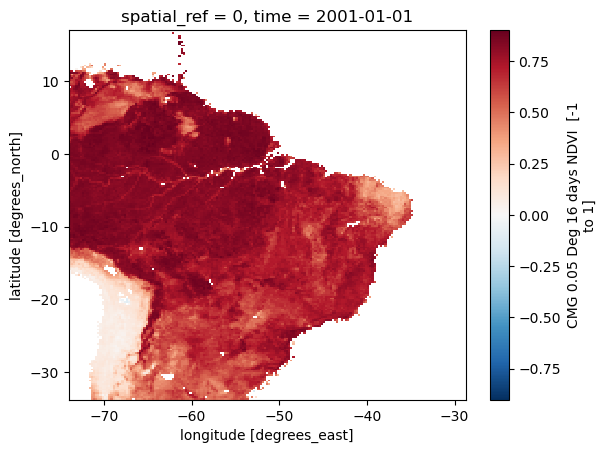

In [21]:
%%time
ds_clipped['ndvi'].isel(time=0).plot()

CPU times: user 362 ms, sys: 194 ms, total: 555 ms
Wall time: 523 ms


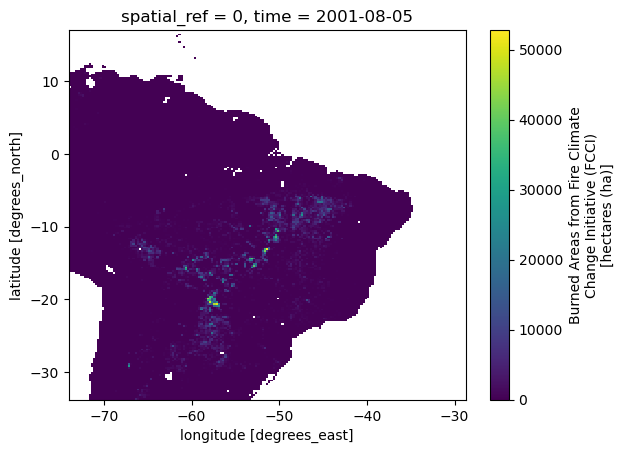

In [22]:
%%time
ds_clipped['fcci_ba'].isel(time=27).plot()

CPU times: user 358 ms, sys: 231 ms, total: 589 ms
Wall time: 491 ms


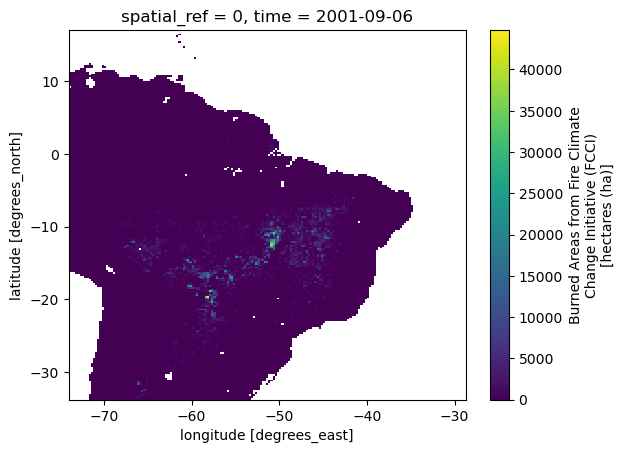

In [23]:
%%time
ds_clipped['fcci_ba'].isel(time=31).plot()

CPU times: user 370 ms, sys: 210 ms, total: 580 ms
Wall time: 466 ms


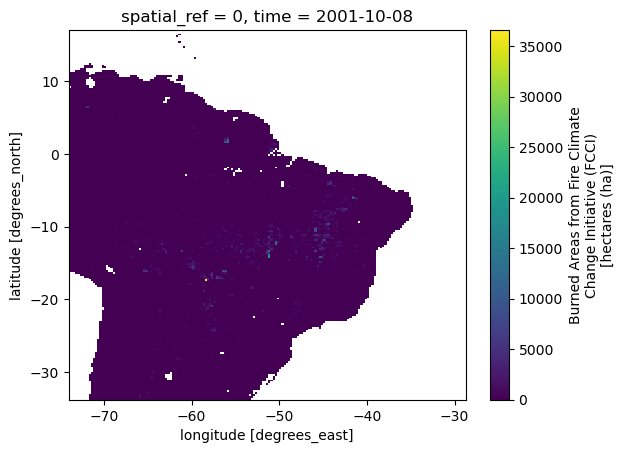

In [24]:
%%time
ds_clipped['fcci_ba'].isel(time=35).plot()